In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import random

In [2]:

def loss(h , y) : 
    return ((h-y)**2).mean()  #mean squared error  
                                          

#predicting class function
def foresee(weights  , bias , X):
        w = np.dot(X , weights) + bias
        y_pred = 1/(1+np.exp(-w))
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]
        return binary_pred

#calculating true/false positives/negatives:
def rate(y_pred , y):
    k=0
    truepos=0
    falsepos=0
    falseneg=0
    trueneg=0
    for x in y_pred :
        if x==1:
            if y[k] == 1:
                truepos+=1
            else:
                falsepos+=1
        else:
            if y[k] == 1:
                falseneg+=1
            else:
                trueneg+=1
        k+=1
    return truepos,falsepos,trueneg,falseneg

In [3]:
#LR using gradient decent 

def Log_Regr(lr  , iterations  , X  , y) :
  
    rows , features  = X.shape
    weights = np.zeros(features) 
    bias = 0 
    y = y.reshape((y.shape[0],))
    
    l = []
    a = []
    #Gradient descent
    for i in range(iterations):
        w = np.dot(X , weights) + bias   
        
        y_pred = 1/(1+np.exp(-w))    #probability class=1
        
        #calculating weight and bias errors
        w_del = np.dot(X.T , y_pred - y)
        b_del = np.sum(y_pred - y)
        
        #updating weights and bias 
        weights = weights - lr*(w_del)
        bias = bias - lr*(b_del)
        
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]     #predicting class
        if i%50 == 0 :
            l.append(loss(np.array(binary_pred) , y))     
            a.append(((binary_pred == y).sum()/len(y))*100)    
      
    return weights,bias,l,a

In [4]:
#LR using stochastic gradient decent 

def Log_RegrSGD(lr, iterations  , X  , y) :
    l=[]
    a=[]
    rows , features  = X.shape #rows x cols
    weights = np.zeros(features)    #initialising weights
    bias = 0    #initialising bias
    y = y.reshape((y.shape[0],))
    iter_no = 0
    
    #Stochastic Gradient descent
    for i in range(iterations):
         
        #chosing a random entry
        ###weights for subset
        random_number = random.randint(0, len(y)-1)   
        x_b, y_b = X[:random_number], y[:random_number]

        w = np.dot(x_b, weights) + bias    #weight vector
        
        y_pred = 1/(1+np.exp(-w))    #probability class=1
        
        #calculating weight and bias errors
        w_del = np.dot(x_b.T , y_pred - y_b)
        b_del = np.sum(y_pred - y_b)
        
        #updating weights and bias 
        weights = weights - lr*(w_del)
        bias = bias - lr*(b_del)
            
        #accuracy and loss for whole set    
        binary_pred = foresee(weights,bias,X)    #predicting class 
        iter_no+=1
        if iter_no%50==0:
            l.append(loss(np.array(binary_pred) , y))     
            a.append(((binary_pred == y).sum()/len(y))*100)    
                
    return weights,bias,l,a

In [5]:
#reading and normalising data

df = pd.read_csv('dataset_LR.csv')

column_names = np.array(df.columns)
column_names = column_names[:-1]
for i in column_names:
    col = np.array(df[i])
    column_mean = np.mean(col)
    column_standard = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-column_mean)/column_standard)
    df[i] = norm_col

df.head()

,attr1,attr2,attr3,attr4,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0



============================================= Learning Rate: 0.001 ============================


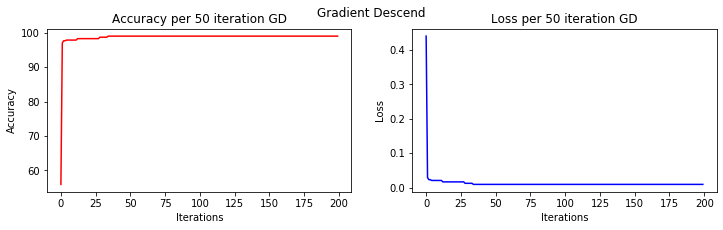

GD weights: [-11.17702715 -12.55312263 -11.52467731  -0.12390573]
GD bias: -5.386512873173513
Loss: 0.009375
Accuracy: 99.0625


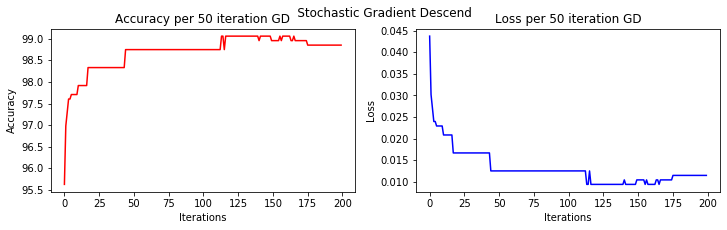

SGD weights: [-9.51104735 -9.98219449 -9.22405316  0.10912758]
SGD bias: -4.322005125706253
Loss: 0.011458333333333333
Accuracy: 98.85416666666667


AVERAGE VALUES
Bias : -4.902903790287038
_________________Training GD___________________
Accuracy : 0.9908333333333333
Precision : 0.9851535416984805
Loss : 0.009166666666666667
Recall : 0.9943609982841233
F score : 0.9897311239447228
 
_________________Testing GD___________________
Accuracy : 0.9888349514563107
Precision : 0.9804445174885904
Loss : 0.009166666666666667
Recall : 0.9944647119248315
F score : 0.9873531865304602
 
Bias : -3.951319075065296
_________________Training SGD___________________
Accuracy : 0.99
Precision : 0.9837898951048482
Loss : 0.01
Recall : 0.9938961410373511
F score : 0.9888132519375755
 
_________________Testing SGD___________________
Accuracy : 0.987378640776699
Precision : 0.9783371496972154
Loss : 0.01
Recall : 0.993395193208254
F score : 0.9857250152348556

============================================= Lea

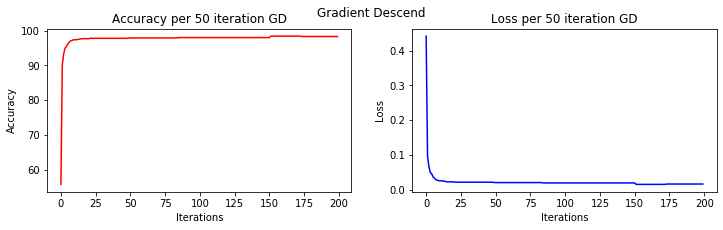

GD weights: [-6.01049305 -6.32586069 -5.76208428  0.07533992]
GD bias: -2.129462539744525
Loss: 0.016666666666666666
Accuracy: 98.33333333333333


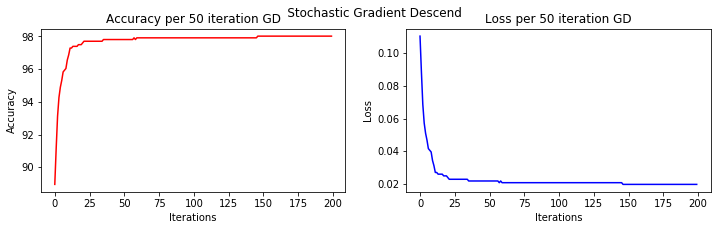

SGD weights: [-5.28222185 -4.97087286 -4.78296322  0.20532345]
SGD bias: -1.55226556978153
Loss: 0.019791666666666666
Accuracy: 98.02083333333333


AVERAGE VALUES
Bias : -2.19893259961044
_________________Training GD___________________
Accuracy : 0.9822916666666667
Precision : 0.9665831638623039
Loss : 0.017708333333333333
Recall : 0.9943497962029322
F score : 0.9802663621622555
 
_________________Testing GD___________________
Accuracy : 0.9898058252427184
Precision : 0.9798007009850024
Loss : 0.017708333333333333
Recall : 0.997874619461044
F score : 0.9887150028746549
 
Bias : -1.6032835020030956
_________________Training SGD___________________
Accuracy : 0.9795833333333334
Precision : 0.9604266473465144
Loss : 0.020416666666666666
Recall : 0.9948214943161398
F score : 0.9773191874708407
 
_________________Testing SGD___________________
Accuracy : 0.9878640776699029
Precision : 0.975749896430319
Loss : 0.020416666666666666
Recall : 0.997874619461044
F score : 0.9866547046210283

=====

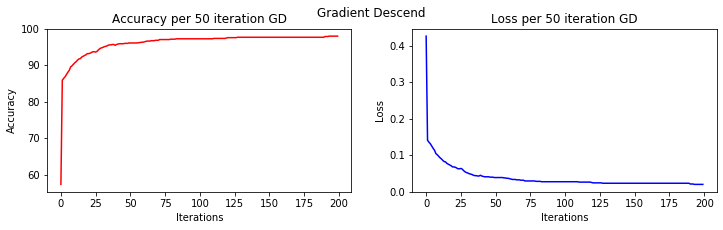

GD weights: [-3.45928959 -2.91360064 -2.68319136  0.29759972]
GD bias: -0.790485359283355
Loss: 0.019791666666666666
Accuracy: 98.02083333333333


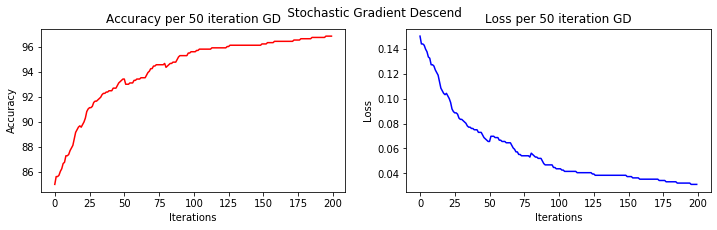

SGD weights: [-2.86265518 -2.1301993  -1.76943945  0.27840257]
SGD bias: -0.588819776007123
Loss: 0.03125
Accuracy: 96.875


AVERAGE VALUES
Bias : -0.7468488729820905
_________________Training GD___________________
Accuracy : 0.9756250000000001
Precision : 0.9525279906326577
Loss : 0.024375
Recall : 0.9938013611051977
F score : 0.9727232600234214
 
_________________Testing GD___________________
Accuracy : 0.9830097087378641
Precision : 0.9686830162964855
Loss : 0.024375
Recall : 0.9959090404059109
F score : 0.9820970666725594
 
Bias : -0.5450524530392148
_________________Training SGD___________________
Accuracy : 0.9712500000000001
Precision : 0.9499645626299229
Loss : 0.02875
Recall : 0.9860744521200338
F score : 0.9676672346536527
 
_________________Testing SGD___________________
Accuracy : 0.9752427184466019
Precision : 0.9652856830480819
Loss : 0.02875
Recall : 0.9823115779139379
F score : 0.9736882612596941


In [6]:
lrate= 0.001
for i in range(3):
    
    print("\n=============================================","Learning Rate:",lrate,"============================")  
    Validity =[]
    Validity_t =[]
    ValiditySGD=[]
    ValiditySGD_t=[]
    Loss=[]
    Loss_t=[]
    LossSGD =[]
    LossSGD_t =[]
    score_F = []
    score_F_t = []
    score_FSGD=[]
    score_FSGD_t=[]
    Exactness=[]
    Exactness_t=[]
    ExactnessSGD =[]
    ExactnessSGD_t =[]
    Recollect=[]
    Recollect_t=[]
    RecollectSGD=[]
    RecollectSGD_t=[]
    Weights=[]
    Bias=[]
    WeightsSGD=[]
    BiasSGD=[]
    
    for j in range(5):     
        no_iter=10000

        df_random = df.sample(frac=1)
        rows , cols = df_random.shape
        a = int((70*rows)/100)
        df_train =  df_random.head(a)
        df_test =  df_random.tail(rows-a)

        X = df_train.iloc[: , 0:4]
        y = df_train.iloc[: ,-1:]
        np_X = X.to_numpy()
        np_y = y.to_numpy()
        
        test_X = df_test.iloc[: , 0:4]
        test_y = df_test.iloc[: , -1:]
        np_X_t = test_X.to_numpy()
        np_y_t = test_y.to_numpy()
        np_y_t = np_y_t.reshape((np_y_t.shape[0],))
            
        
        ######GD
        #training
        weights,bias,los, acc = Log_Regr(lrate , no_iter , np_X , np_y)
        
        #graph
        if(j==1):
            fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,3))
            fig.suptitle("Gradient Descend")
            ax1.plot(acc,color='red')
            ax1.set_title("Accuracy per 50 iteration GD")
            ax1.set_xlabel("50 Iterations")
            ax1.set_ylabel("Accuracy")
            ax2.plot(los,color='blue')
            ax2.set_title("Loss per 50 iteration GD")
            ax2.set_xlabel("50 Iterations")
            ax2.set_ylabel("Loss")
            plt.show()    
            print("GD weights:",weights)
            print("GD bias:",bias)
            print("Loss:",los[-1])
            print("Accuracy:",acc[-1])
        
             
        foresaw = foresee(weights , bias , np_X)
        truepos,falsepos,trueneg,falseneg = rate(foresaw , np_y) 
        exactness = truepos/(truepos+falsepos)
        recollect = truepos/(truepos+falseneg)
        f1 = 2/((1/recollect) + (1/exactness))
        validity= (truepos+trueneg)/(truepos+trueneg+falsepos+falseneg)
      
        Validity.append(validity)
        Bias.append(bias)
        Loss.append(los[-1])
        score_F.append(f1)
        Exactness.append(exactness)
        Recollect.append(recollect)

        ##testing
        foresaw = foresee(weights , bias , np_X_t)
        truepos,falsepos,trueneg,falseneg = rate(foresaw , np_y_t)        
        exactness = truepos/(truepos+falsepos)
        recollect = truepos/(truepos+falseneg)
        f1 = 2/((1/recollect) + (1/exactness))
        validity= (truepos+trueneg)/(truepos+trueneg+falsepos+falseneg)
        
        Validity_t.append(validity)
        Loss_t.append(los[-1])
        score_F_t.append(f1)
        Exactness_t.append(exactness)
        Recollect_t.append(recollect)
        


      
        ####SGD   
        ##training
        weightsSGD , biasSGD , lSGD , aSGD = Log_RegrSGD(lrate , no_iter, np_X , np_y)
        
        #graph
        if(j==1):
            fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,3))
            fig.suptitle("     Stochastic Gradient Descend")
            ax1.plot(aSGD,color='red')
            ax1.set_title("Accuracy per 50 iteration GD")
            ax1.set_xlabel("50 Iterations")
            ax1.set_ylabel("Accuracy")
            ax2.plot(lSGD,color='blue')
            ax2.set_title("Loss per 50 iteration GD")
            ax2.set_xlabel("50 Iterations")
            ax2.set_ylabel("Loss")
            plt.show()
            print("SGD weights:",weightsSGD)
            print("SGD bias:",biasSGD)
            print("Loss:",lSGD[-1])
            print("Accuracy:",aSGD[-1])
         
        
        foresaw = foresee(weightsSGD , biasSGD , np_X)
        truepos,falsepos,trueneg,falseneg = rate(foresaw , np_y)  
        exactness = truepos/(truepos+falsepos)
        recollect = truepos/(truepos+falseneg)
        f1 = 2/((1/recollect) + (1/exactness))
        validity= (truepos+trueneg)/(truepos+trueneg+falsepos+falseneg)
        
        ValiditySGD.append(validity)
        BiasSGD.append(biasSGD)
        LossSGD.append(lSGD[-1])
        score_FSGD.append(f1)
        ExactnessSGD.append(exactness)
        RecollectSGD.append(recollect)

        
        ##testing
        foresaw = foresee(weightsSGD , biasSGD , np_X_t)
        truepos,falsepos,trueneg,falseneg = rate(foresaw , np_y_t)
        exactness = truepos/(truepos+falsepos)
        recollect = truepos/(truepos+falseneg)
        f1 = 2/((1/recollect) + (1/exactness))
        validity= (truepos+trueneg)/(truepos+trueneg+falsepos+falseneg)
        
        ValiditySGD_t.append(validity)
        LossSGD_t.append(lSGD[-1])
        score_FSGD_t.append(f1)
        ExactnessSGD_t.append(exactness)
        RecollectSGD_t.append(recollect)
        
    
    print("\n\nAVERAGE VALUES")
    print("Bias :" ,mean(Bias))
    print("_________________Training GD___________________")
    print("Accuracy :" ,mean(Validity))
    print("Precision :",mean(Exactness))
    print("Loss :",mean(Loss))
    print("Recall :",mean(Recollect))
    print("F score :",mean(score_F))

    print(" ")
    print("_________________Testing GD___________________")
    print("Accuracy :" ,mean(Validity_t))
    print("Precision :",mean(Exactness_t))
    print("Loss :",mean(Loss_t))
    print("Recall :",mean(Recollect_t))
    print("F score :",mean(score_F_t))

    print(" ")
    print("Bias :" ,mean(BiasSGD))
    print("_________________Training SGD___________________")
    print("Accuracy :" ,mean(ValiditySGD))
    print("Precision :",mean(ExactnessSGD))
    print("Loss :",mean(LossSGD))
    print("Recall :",mean(RecollectSGD))
    print("F score :",mean(score_FSGD))

    print(" ")
    print("_________________Testing SGD___________________")
    print("Accuracy :" ,mean(ValiditySGD_t))
    print("Precision :",mean(ExactnessSGD_t))
    print("Loss :",mean(LossSGD_t))
    print("Recall :",mean(RecollectSGD_t))
    print("F score :",mean(score_FSGD_t))
    if(i!=2):
        lrate=lrate/10   